# <p style="background-color:#06b2ca; font-family:Georgia ; color:#494949; font-size:150%; text-align:center;  border-radius:10% / 100%;">Online Retail</p>

<img src="online-retail.jpg" alt="Online Retail" style="width:50%; border-radius: 50px;  display: block; margin-left: auto; margin-right: auto;" >

# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca">1) درباره مجموعه داده</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  مجموعه داده شامل تمام معاملات یک فروشگاه اینترنتی که هر سطر بیانگر یک خرید کالا توسط مشتری بین تاریخ 2010/12/01 و 2011/12/09 ثبت شده است.


</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca">2) فراخوانی کتابخانه‌های مورد نیاز</h1>

In [32]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca">3) خواندن مجموعه داده</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  ابتدا مجموعه داده را با استفاده از کتابخانه pandas می‌خوانیم:

</div>

In [3]:
# Read dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# <h1 dir='rtl' style= "margin-right: 20px ;  color:#06b2ca">4) مشخصات مجموعه داده </h1>

In [4]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
print("DATA TYPES".center(125,'-'))
print(df.dtypes.value_counts())

----------------------------------------------------------DATA TYPES---------------------------------------------------------
object            4
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64


          

<!DOCTYPE html>
<html>
<head>
<style>
  table {
      width: 90%;
      border-collapse: collapse;
      background-color:#124559;
      margin-left: 50px;
  }
  th, td {
      border: 1px solid;
      background-color:#124559;
      border: 1px solid #ddd;
      padding: 8px;
      text-align: center;
      word-wrap: break-word;
      color:#eff6e0;
      font-size:110%
  }
</style>
</head>
<body>

<table dir='rtl'>
  <tr>
    <th>ردیف</th>
    <th>متغیر</th>
    <th>توضیحات</th>
  </tr>
  <tr>
    <td>1</td>
    <td>InvoiceNo</td>
    <td>شماره فاکتور، یک عدد 6 رقمی که به طور منحصر به فرد به هر تراکنش اختصاص داده می شود.</td> 
    <!-- اگر این کد با حرف "c" شروع شود، نشان دهنده لغو است. -->
     <!-- (سبد خرید) -->
  </tr>
  <tr>
    <td>2</td>
    <td>StockCode</td>
    <td> کد محصول، یک عدد 5 رقمی که به طور منحصر به فرد به هر محصول مجزا اختصاص داده می شود.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Description</td>
    <td>نام محصول</td>
    <!-- توضیحات کالا -->
  </tr>
  <tr>
    <td>4</td>
    <td>Quantity</td>
    <td>تعداد هر محصول در هر تراکنش.</td>
    <!-- تعداد محصولی که از اون کالا خرید شده -->
  </tr>
  <tr>
    <td>5</td>
    <td>InvoiceDate</td>
    <td>تاریخ و زمان هر تراکنش ایجاد شده.</td>
    <!-- تاریخ خرید -->
  </tr>
  <tr>
    <td>6</td>
    <td>UnitPrice</td>
    <td>قیمت یک کالا به واحد پول رایج که به صورت عددی ثبت شده است.</td>
    <!-- مبلغ واحد اون کالا -->
  </tr>
  <tr>
    <td>7</td>
    <td>CustomerID</td>
    <td> شماره مشتری، یک عدد 5 رقمی که منحصراً به هر مشتری اختصاص داده می شود.</td>
    <!-- شماره مشتری -->
  </tr>
  <tr>
    <td>8</td>
    <td>Country</td>
    <td> نام کشوری که هر مشتری در آن ساکن است.</td>
    <!-- کشور مشتری -->
  </tr>
</table>

</body>
</html>


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به طور خلاصه 8 تا ستون و 541909 سطر در مجموعه داده وجود دارد.

* 8 ویژگی مختلف وجود دارد که 3 تا از آنها نوع عددی و 4 ویژگی رشته‌ای از نوع 'object' و 1 ویژگی به صورت تاریخ ثبت شده است.

</div>

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با توجه به اطلاعات به دست آمده مقادیر و قیمت‌های منفی در مجموعه داده وجود دارد.

* اکثر تراکنش‌ مشتری‌ها با تعداد محصولات از 3 تا 10 قلم است و همینطور اکثر اقلام دارای قیمتی تا 5 پوند هستند.

* یک سری موارد پرت هم وجود دارد که بعداً به آن پرداخته می‌شود.

</div>

In [6]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* از 38 کشور مختلف تراکنش‌ها انجام شده که اکثریت مشتری‌ها مربوط به کشور بریتانیا هستند.

* بیشترین محصولی که خریداری شده توسط مشتری‌ها مربوط به کد محصول 85123A که با توجه به توضیحات داده شده محصول مورد نظر یک قلب نگهدارنده سفید می‌باشد. 


</div>

In [7]:
print("Is NA?")
print(df.isna().sum())

Is NA?
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
print("Null values in the dataset: ",df.isnull().sum().sum())

Null values in the dataset:  136534


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به نظر می‌رسد تعداد زیادی از داده‌های مشتری‌ها و توضیحات مقادیر صفر وجود دارد، بطور کلی می‌تواند دلایل متعددی داشته باشد که یکی از دلایل آن ممکن است مشتری خریدی انجام نداده باشد. با پر کردن مقادیر تهی ممکن مشکلاتی در نتیجه پیش بیاید پس بهترین راه حذف کردن مشتری‌هایی که مقادیرشون صفر است.

</div>

In [9]:
df = df[df['CustomerID'].notnull()]
print("Null values in the dataset: ",df.isnull().sum().sum())

Null values in the dataset:  0


In [10]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با حذف مقادیر صفر 406829 مشتری باقی مانده است.

</div>

In [11]:
print("Negative value in Quantity is:",(df.Quantity<0).sum())
print("Negative value in Price is:",(df.UnitPrice<0).sum())

Negative value in Quantity is: 8905
Negative value in Price is: 0


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  با توجه به اطلاعات قبلی بعضی از سطرها تعداد محصولات و قیمت‌ها منفی ثبت شده بود. با حذف مقادیر تهی همچنان  مجموعه داده 8905 تعداد محصولات به صورت منفی ثبت شده است.

</div>

In [12]:
#remove negetive Quantity
df = df[df.Quantity > 0]
print("Negative value in Quantity is:",(df.Quantity<0).sum())
print("Number of remaining customers:",(len(df)))

Negative value in Quantity is: 0
Number of remaining customers: 397924


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به خاطر سادگی تحلیل این پروژه، مقادیر منفی نادیده گرفته می‌شود که با حذف مقادیر منفی 397924 مشتری باقی مانده است.

</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca">5) تحلیل اکتشافی داده‌ها (EDA)</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

</div>

In [13]:
#pivoting to get top products by quantity
global_popularity=df.pivot_table(
    index=['StockCode','Description'],
    values='Quantity',
    aggfunc='sum').sort_values(
    by='Quantity', ascending=False)
print('Top 10 popular items globally....')
global_popularity.head(10)

Top 10 popular items globally....


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
85099B,JUMBO BAG RED RETROSPOT,46181
85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725
84879,ASSORTED COLOUR BIRD ORNAMENT,35362
21212,PACK OF 72 RETROSPOT CAKE CASES,33693
22197,POPCORN HOLDER,30931
23084,RABBIT NIGHT LIGHT,27202


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  نمودار زیر به ترتیب 10تا از محبوب ترین محصولات را نشان می‌دهد

</div>

Text(0, 0.5, 'Item')

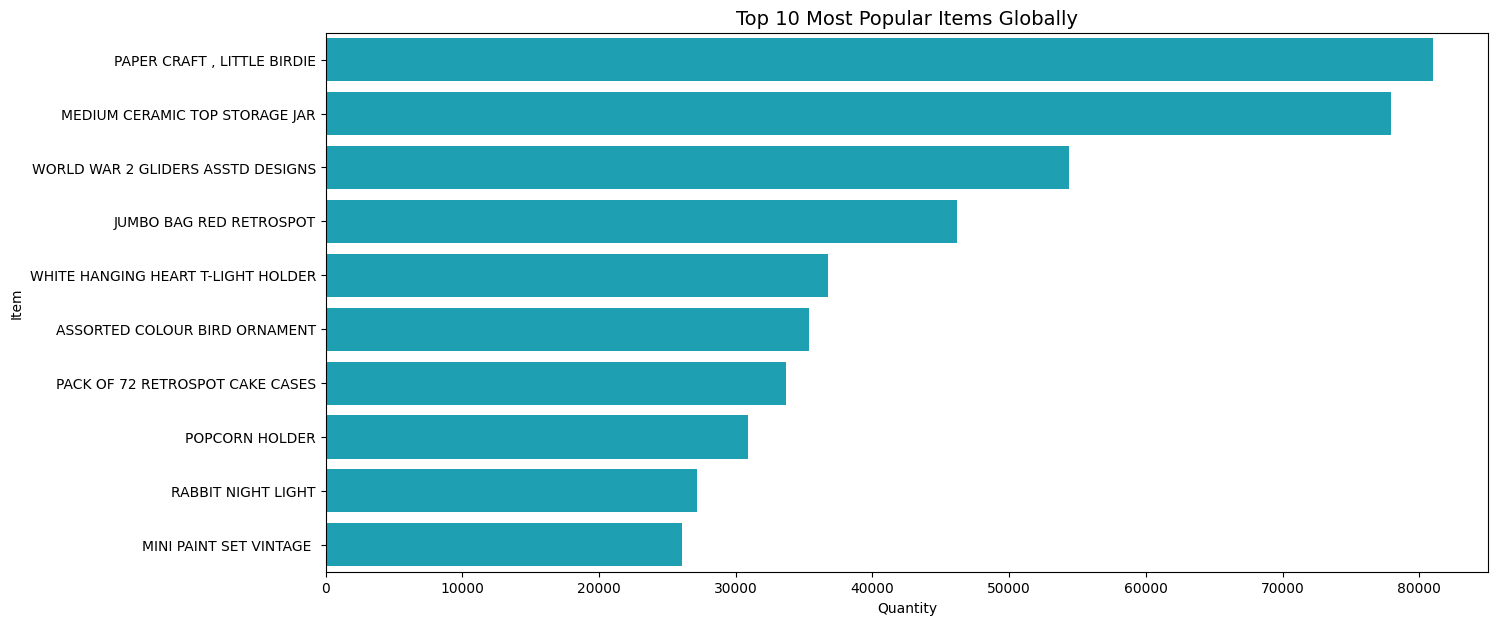

In [14]:
#viz - top products by quantity
plt.figure(figsize=(15,7))
global_popularity.reset_index(inplace=True)
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(10), color='#06b2ca')
plt.title('Top 10 Most Popular Items Globally', fontsize=14)
plt.ylabel('Item')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* در نمودار زیر 10 تا از پروفروش ترین محصولات که اغلب در سفارشات ظاهر می‌شوند نمایش داده شده است.

</div>

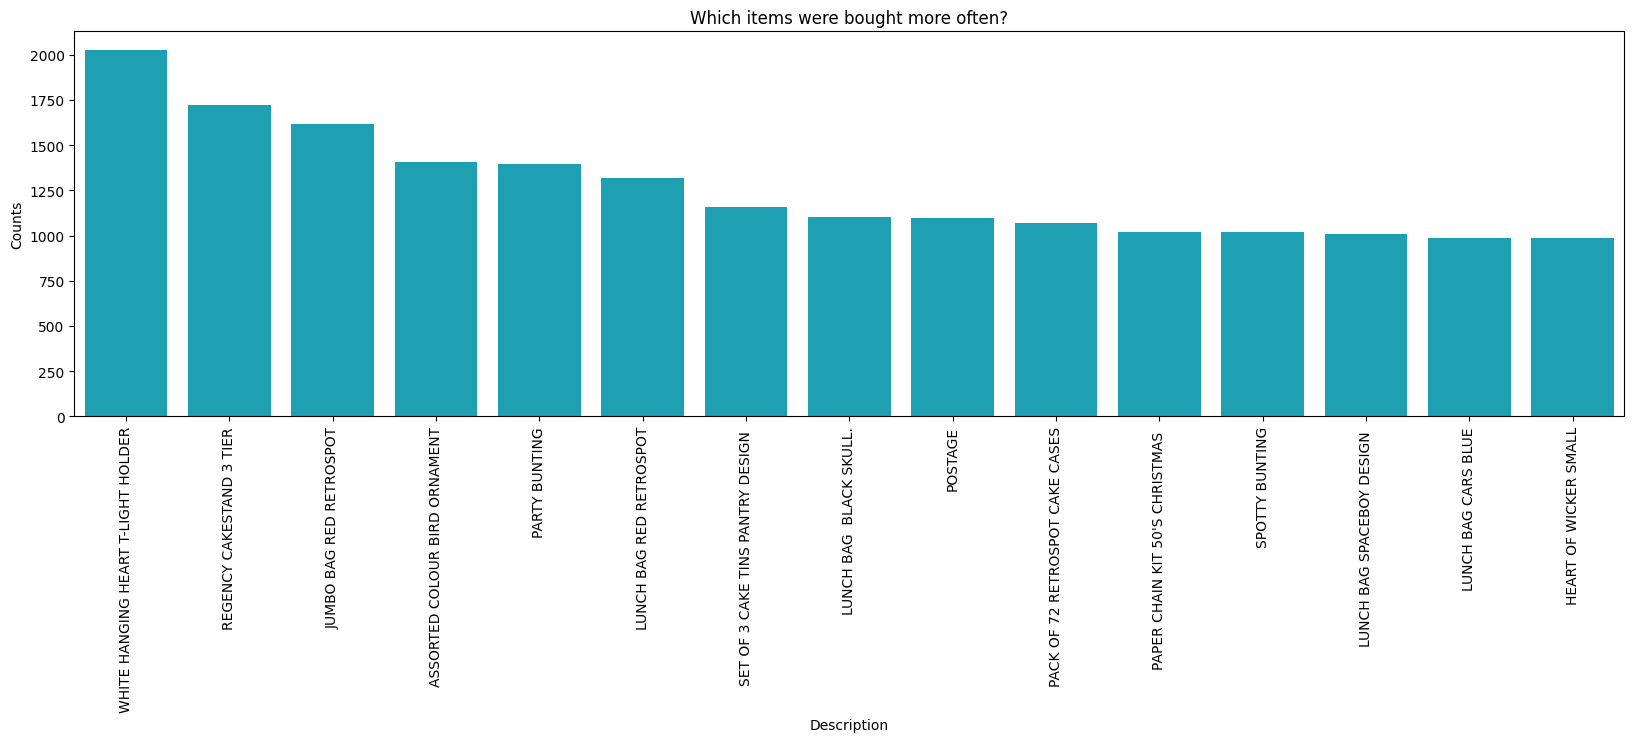

In [15]:
# Which items were bought more often?
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(20,5))
sns.barplot(x=item_counts.index, y=item_counts.values, color='#06b2ca')
plt.ylabel("Counts")
plt.title("Which items were bought more often?")
plt.xticks(rotation=90)
plt.show()

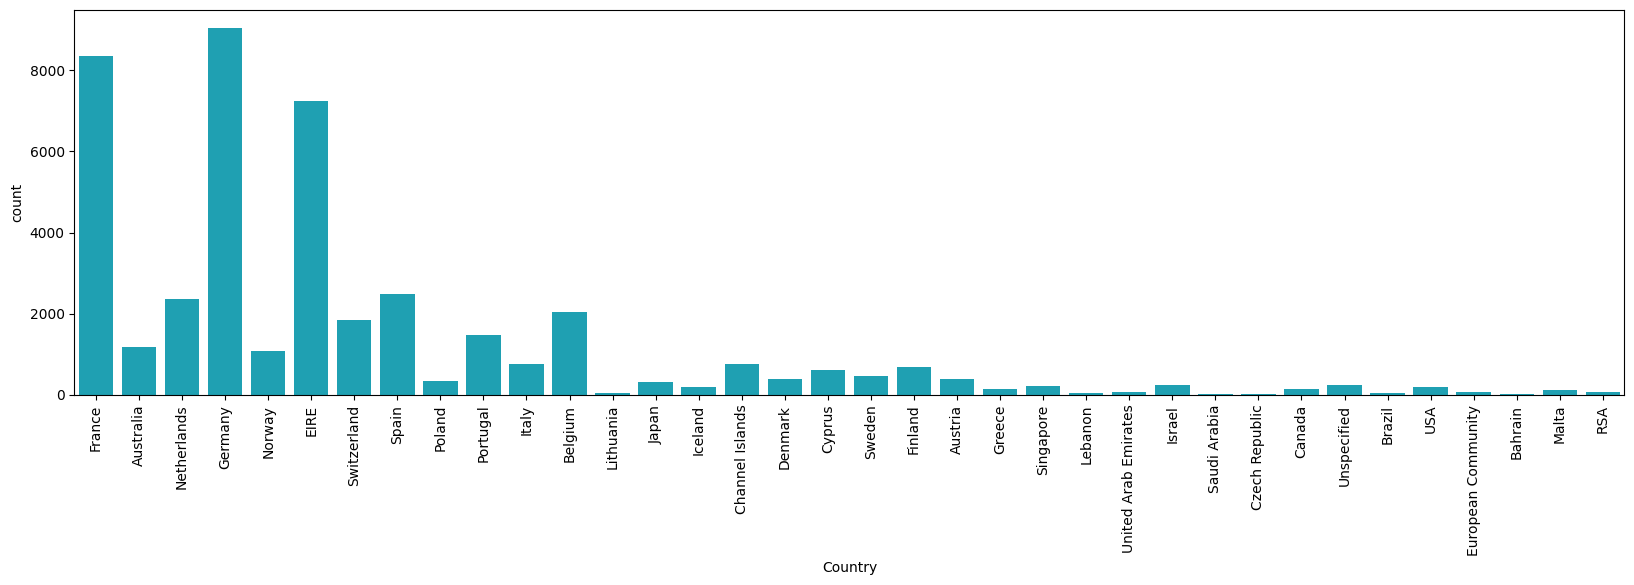

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x=df[df['Country'] != 'United Kingdom']['Country'], color='#06b2ca')
plt.xticks(rotation=90)
plt.show()

In [17]:
uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

89.05%


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* از محاسبات بالا می توان دریافت که اکثریت فروش در بریتانیا انجام شده و تنها 10.95 درصد از فروش به خارج از کشور رفته است.

</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#06b2ca">5) تشخیص نقاط پرت</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

</div>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* تشخیص نقاط پرت با استفاده از نمودار پراکندگی  نقاطی  که از نظر بصری خارج از محدوده هستند حذف می‌شوند. مانند نمودار زیر:

</div>

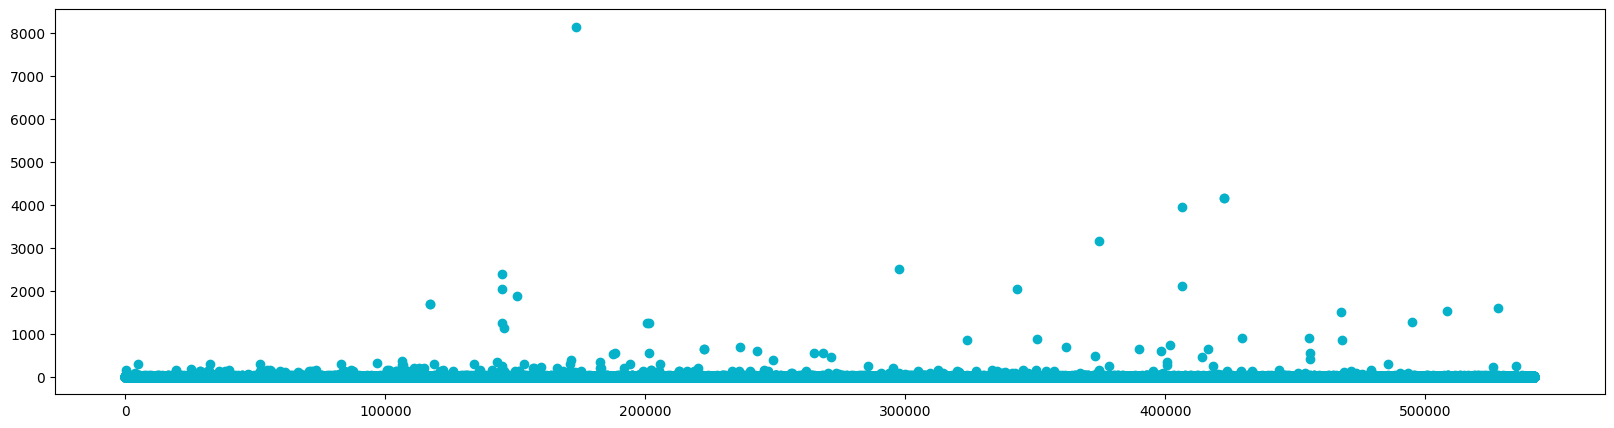

In [18]:
plt.figure(figsize=(20,5))
plt.scatter(x=df.index, y=df['UnitPrice'], color='#06b2ca')

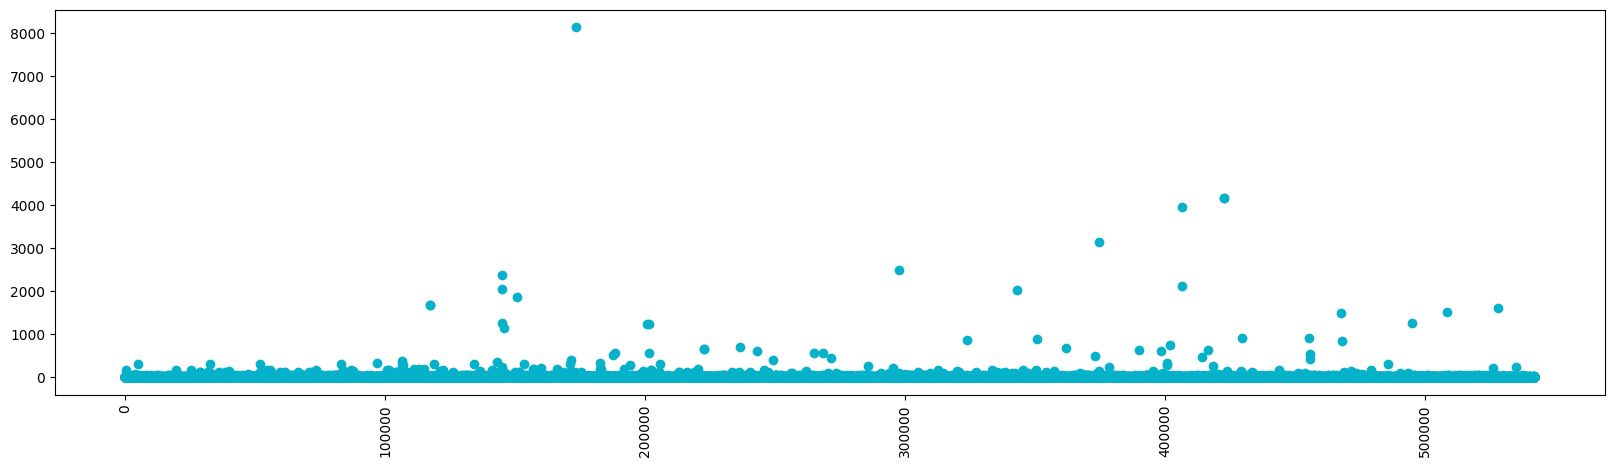

In [19]:
df = df[df['UnitPrice'] < 25000]
plt.figure(figsize=(20,5))
plt.scatter(x=df.index, y=df['UnitPrice'], color='#06b2ca')
plt.xticks(rotation=90)
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* پس از حذف مقادیر پرت آشکار، همچنان مقادیری وجود دارند که از توزیع نرمال خارج هستند.

</div>

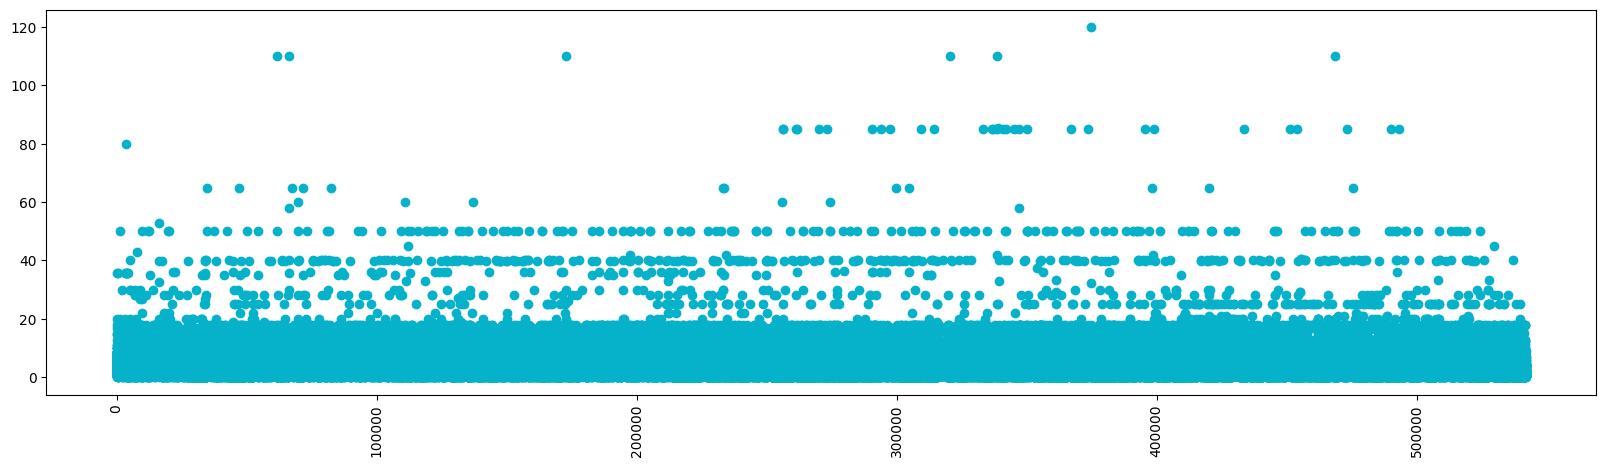

In [20]:
df = df[df['UnitPrice'] < 125]
plt.figure(figsize=(20,5))
plt.scatter(x=df.index, y=df['UnitPrice'], color='#06b2ca')
plt.xticks(rotation=90)
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به نظر می رسد داده مورد نظر تقریباً برای مدل سازی آماده است. موارد پرت را که تعادل مجموعه داده را به هم می زد، حذف شده‌اند. اکنون داده ها  بسیار بهتر به نظر می رسند.

</div>

In [21]:
# Monthly sales trend
df['INV_DATE'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['INV_DATE'].dt.month_name()
monthly_sales = df.groupby('Month')['Quantity'].sum()

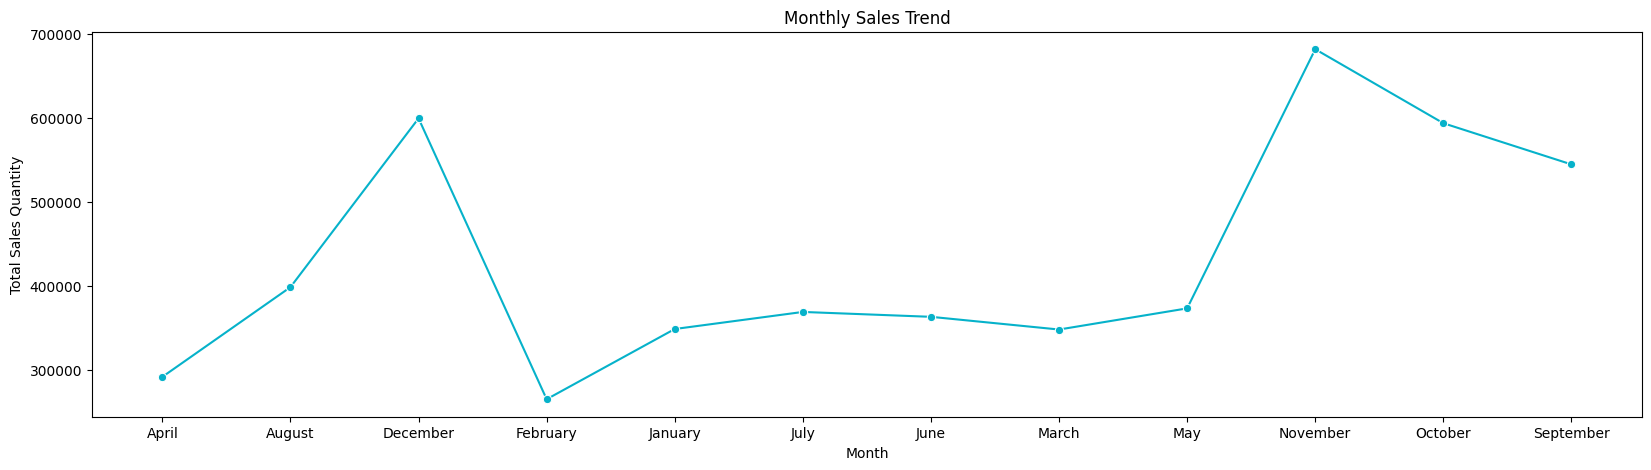

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='#06b2ca')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend')
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* ماه‌های Dec و Nov تعدادی که خریداری شده بیشتر نسبت به ماه‌های گذشته که در نمودار نمایش داده شده استه و در ماه Feb افت بسیار شدیدی داشته است.

</div>

____


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* تجزیه و تحلیل  به همراه پاکسازی روی مجموعه داده مورد نظر انجام شده است. حال روش BoP روی مجموعه داده اجرا می‌شود بطوریکه تعداد هر مشتری را از هر محصول درون مجموعه df_bop  قرار داده شده است.

</div>

In [25]:
df_bop = df.groupby(['CustomerID', 'StockCode'])['Quantity'].count().unstack(fill_value=0)
df_bop

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

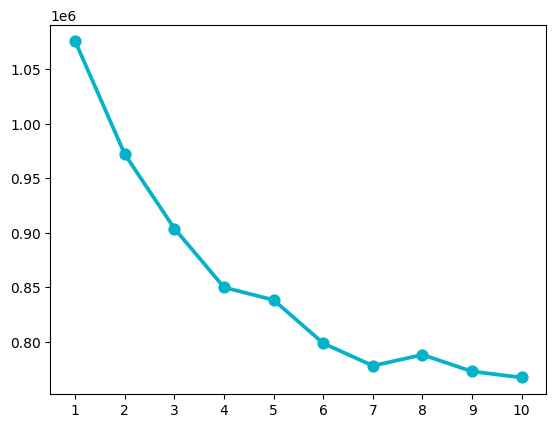

In [26]:
X = df_bop[df_bop.columns[:]].values
wcss = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_
    
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()), color='#06b2ca')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با توجه به شیب نمودار نمایش داده شده 4 تا خوشه مناسب است.

</div>

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans.fit(X)
y_train = kmeans.labels_

In [35]:
silhouette_score(X, kmeans.labels_)

0.5738403449291736

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* برای ارزیابی الگوریتم K-Means خوشه‌ها را به عنوان لیبل به یک الگوریتم طبقه بندی مانند KNN داده می‌شود تا یادگیری صورت گیرد.
</div>

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

# predict on train dataset
y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4298
           1       0.78      0.21      0.33        34
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.99      4334
   macro avg       0.44      0.30      0.33      4334
weighted avg       0.99      0.99      0.99      4334



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* اکنون همین داده با الگوریتم DBSCAN سنجیده می‌شود.
</div>

<Axes: >

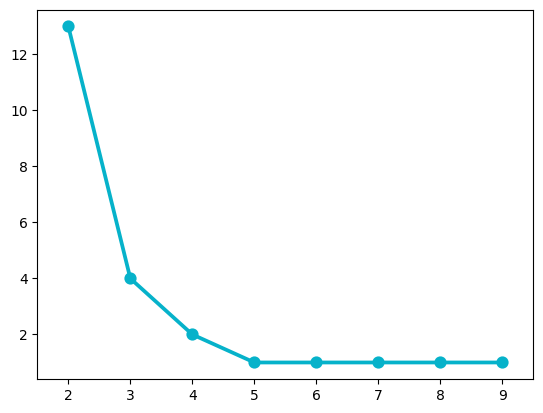

In [29]:
p = {}

for k in range(2, 10):
    dbscan = DBSCAN(eps=0.9, min_samples=k)
    dbscan.fit(X)
    p[k] = len(np.unique(dbscan.labels_))
    
sns.pointplot(x=list(p.keys()), y=list(p.values()), color='#06b2ca')

In [30]:
dbscan = DBSCAN(eps=0.9, min_samples=3)
dbscan.fit(X)
print(np.unique(dbscan.labels_))
y_train = dbscan.labels_

[-1  0  1  2]


In [30]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

# predict on train dataset
y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99      4324
           0       0.21      1.00      0.35         3
           1       0.09      1.00      0.16         4
           2       0.13      1.00      0.23         3

    accuracy                           0.98      4334
   macro avg       0.36      1.00      0.43      4334
weighted avg       1.00      0.98      0.99      4334



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* همانطور که نتایج نشان می‌دهد الگوریتم DBSCAN اکثریت نقاط پرت در نظر گرفته است. 

</div>

In [33]:
silhouette_score(X, dbscan.labels_)

-0.4389479115773772

____

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  به دلیل ابعاد بالا و تعداد مقادیر صفر زیاد در ستون محصولات، محصولاتی که بیشترین خریدار را دارند در نظر گرفته می‌شود که به گونه‌ای با کاهش ابعاد الگوریتم‌های خوشه بندی بهتر عمل کنند.

</div>

In [36]:
product_counts = df['StockCode'].value_counts()
product_counts

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: count, Length: 3663, dtype: int64

In [37]:
products = product_counts[product_counts > 1000].index.tolist()
print(len(products))

17


In [38]:
df_filtered = df[df['StockCode'].isin(products)]
df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,INV_DATE,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,December
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,2010-12-01 08:45:00,December
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,2010-12-01 09:00:00,December
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010-12-01 09:02:00,December
...,...,...,...,...,...,...,...,...,...,...
541800,581578,23298,SPOTTY BUNTING,9,2011-12-09 12:16:00,4.95,12713.0,Germany,2011-12-09 12:16:00,December
541818,581579,22086,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011-12-09 12:19:00,2.95,17581.0,United Kingdom,2011-12-09 12:19:00,December
541825,581579,22197,POPCORN HOLDER,24,2011-12-09 12:19:00,0.85,17581.0,United Kingdom,2011-12-09 12:19:00,December
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,2011-12-09 12:23:00,December


In [45]:
bop_filtered = df_filtered.groupby(['CustomerID', 'StockCode'])['Quantity'].count().unstack(fill_value=0)
bop_filtered

StockCode,20725,20727,21212,22086,22197,22382,22383,22423,22720,23203,23209,23298,47566,84879,85099B,85123A,POST
CustomerID,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18274.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
18277.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  با حذف محصولات کمتر خریدار شده تعداد ستون‌ها کاهش یافته. حال داده مورد نظر برای خوشه بندی با استفاده از روش K-Means و DBSCAN اجرا میکنیم. 

</div>

<Axes: >

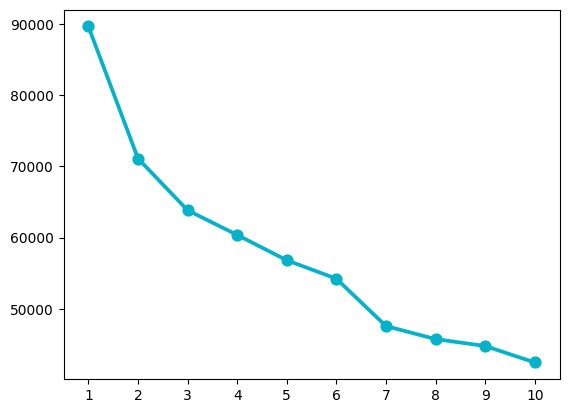

In [40]:
X = bop_filtered[bop_filtered.columns[:]].values
wcss = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()), color='#06b2ca')

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با توجه به شیب نمودار 4تا خوشه مناسب است.

</div>

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans.fit(X)
y_train = kmeans.labels_

In [42]:
silhouette_score(X, kmeans.labels_)

0.5099181551129303

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       215
           1       0.98      1.00      0.99      2860
           2       0.00      0.00      0.00         1
           3       0.95      0.69      0.80        26

    accuracy                           0.98      3102
   macro avg       0.72      0.62      0.67      3102
weighted avg       0.98      0.98      0.98      3102



In [38]:
dbscan = DBSCAN(eps=0.9, min_samples=70)
dbscan.fit(X)
print(np.unique(dbscan.labels_))
y_train = dbscan.labels_

[-1  0  1  2  3]


In [39]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2709
           0       1.00      1.00      1.00       119
           1       0.97      1.00      0.99        76
           2       1.00      1.00      1.00       115
           3       0.99      1.00      0.99        83

    accuracy                           1.00      3102
   macro avg       0.99      1.00      1.00      3102
weighted avg       1.00      1.00      1.00      3102



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با توجه به نتیجه بازهم الگوریتم DBSCAN درصد بالایی از داده‌ را نقاط پرت در نظر گرفته است. اما با کاهش ابعاد صورت گرفته نتیجه ارزیابی الگوریتم عملکرد مناسبی داشته است ولی فقط مشتری‌هایی که بیش از 1000 کالا خریداری کردند در این مجموعه داده قرار گرفتند.

</div>

____

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* برای افزایش ابعاد و تعداد محصولات تنها مشتری‌هایی که تعداد خرید کالا بیش از 500 داشتند در این مرحله ارزیابی می‌شود.

</div>

In [40]:
products = product_counts[product_counts > 500].index.tolist()
print(len(products))

125


In [41]:
df_filtered = df[df['StockCode'].isin(products)]
bop_filtered = df_filtered.groupby(['CustomerID', 'StockCode'])['StockCode'].count().unstack(fill_value=0)

<Axes: >

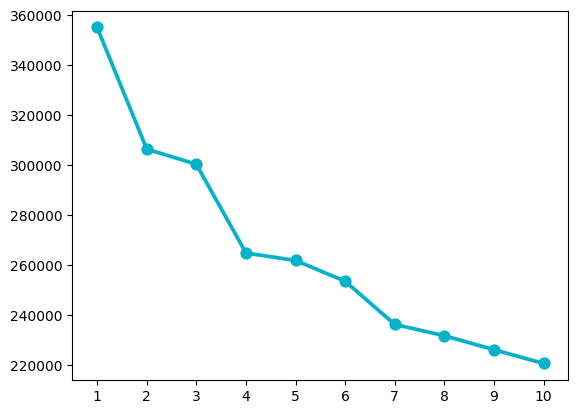

In [42]:
X = bop_filtered[bop_filtered.columns[:]].values
wcss = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()), color='#06b2ca')

In [43]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans.fit(X)
y_train = kmeans.labels_

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=25)

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67       276
           1       0.00      0.00      0.00         1
           2       0.91      0.48      0.62        21
           3       0.97      1.00      0.98      3734

    accuracy                           0.96      4032
   macro avg       0.70      0.50      0.57      4032
weighted avg       0.96      0.96      0.96      4032



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* همین داده با الگوریتم DBSCAN سنجیده می‌شود.
</div>

<Axes: >

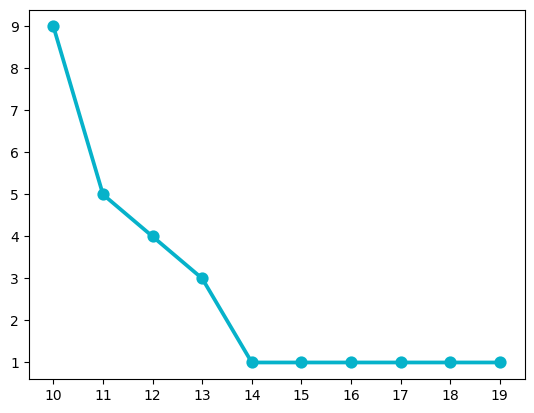

In [45]:
p = {}

for k in range(10, 20):
    dbscan = DBSCAN(eps=0.9, min_samples=k)
    dbscan.fit(X)
    p[k] = len(np.unique(dbscan.labels_))
    
sns.pointplot(x=list(p.keys()), y=list(p.values()), color='#06b2ca')

In [46]:
dbscan = DBSCAN(eps=0.9, min_samples=11)
dbscan.fit(X)
print(np.unique(dbscan.labels_))
y_train = dbscan.labels_

[-1  0  1  2  3]


In [47]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y_train)

y_pred = knn_model.predict(X)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      3983
           0       0.33      1.00      0.50        11
           1       0.71      1.00      0.83        12
           2       0.65      1.00      0.79        13
           3       0.62      1.00      0.76        13

    accuracy                           0.99      4032
   macro avg       0.66      1.00      0.77      4032
weighted avg       0.99      0.99      0.99      4032



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* با افزایش مشتری‌ها و تعداد ستون محصولات الگوریتم DBSCAN اکثریت داده به عنوان نقاط پرت در نظر می‌گیرد.

* بطور کلی بهترین نتیجه به دست آمده مربوط به تعداد خرید بیش از 1000 محصول است که با 17  ستون و 3102 مشتری داده مورد نظر را تشکیل می‌دهد.

</div>